In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [54]:
loan_dataset=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [55]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
loan_dataset.shape

(614, 13)

In [57]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
loan_dataset=loan_dataset.dropna()

In [60]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<B>Label Encoding</B>

In [61]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [62]:
loan_dataset.replace({"Married":{'No':0,'Yes':1}},inplace=True)

In [63]:
loan_dataset.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

In [64]:
loan_dataset.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)

In [65]:
loan_dataset.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace=True)

In [86]:
loan_dataset.replace({"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [87]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [88]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [89]:
#replace all 3+ with 4
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [90]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<B>Data Visualisation</B>

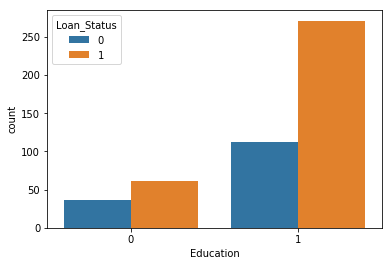

In [91]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

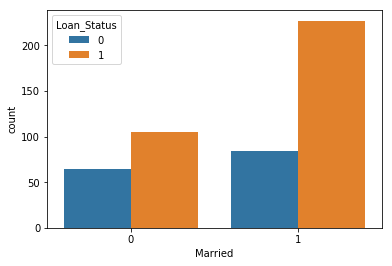

In [92]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [93]:
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

In [94]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
6         1        1          0          0              0             2333   
7         1        1          4          1              0             3036   
8         1        1          2          1              0             4006   
9         1        1          1          1              0            12841   
10        1        1          2          1              0             3200   
12        1        1          2          1              0             3073   
13        1        0          0          1              0       

<B>Train Test Split</B>

In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [96]:
print(X.shape)

(480, 11)


<B>SVM Model</B>

In [97]:
classifier=svm.SVC(kernel='linear')

In [98]:
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [99]:
X_train_prediction=classifier.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [100]:
print('Accuracy on training data: ',training_accuracy)

Accuracy on training data:  0.7731481481481481


In [101]:
X_test_prediction=classifier.predict(X_test)
testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [102]:
print('Accuracy on testing data: ',testing_accuracy)

Accuracy on testing data:  0.8541666666666666
